# Dataset Visualisation & Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pandas import read_csv
from pandas import DataFrame
from matplotlib.axes import Axes

In [2]:
dataset, DATASET_LABEL = read_csv('../data/processed/dataset_nifti.csv'), 'Dataset'
train, TRAINING_LABEL = dataset[dataset['split'] == 'train'], 'Training Set'
valid, VALIDATION_LABEL = dataset[dataset['split'] == 'valid'], 'Validation Set'
test, TESTING_LABEL = dataset[dataset['split'] == 'test'], 'Test Set'

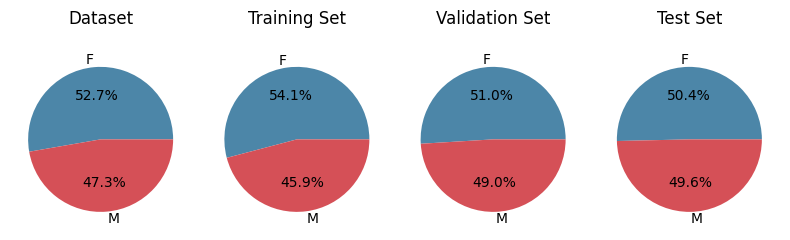

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 8))

def create_genre_pie(axs: np.ndarray[Axes], idx: int, df: DataFrame, label: str) -> None:
    sex_counts = df['sex'].value_counts()
    axs[idx].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['#4C86A8', '#D55057'])
    axs[idx].set_title(label=label, pad=18)

create_genre_pie(axs, 0, dataset, DATASET_LABEL)
create_genre_pie(axs, 1, train, TRAINING_LABEL)
create_genre_pie(axs, 2, valid, VALIDATION_LABEL)
create_genre_pie(axs, 3, test, TESTING_LABEL)

plt.tight_layout()
plt.show()

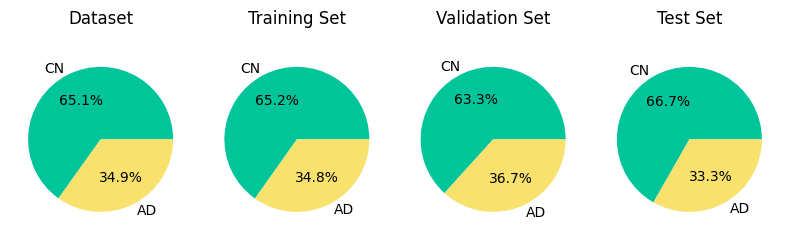

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 8))

def create_diagnosis_pie(axs: np.ndarray[Axes], idx: int, df: DataFrame, label: str) -> None:
    dx_counts = df['diagnosis'].value_counts()
    axs[idx].pie(dx_counts, labels=dx_counts.index, autopct='%1.1f%%', colors=['#00C49A', '#F8E16C'])
    axs[idx].set_title(label=label, pad=18)

create_diagnosis_pie(axs, 0, dataset, DATASET_LABEL)
create_diagnosis_pie(axs, 1, train, TRAINING_LABEL)
create_diagnosis_pie(axs, 2, valid, VALIDATION_LABEL)
create_diagnosis_pie(axs, 3, test, TESTING_LABEL)

plt.tight_layout()
plt.show()

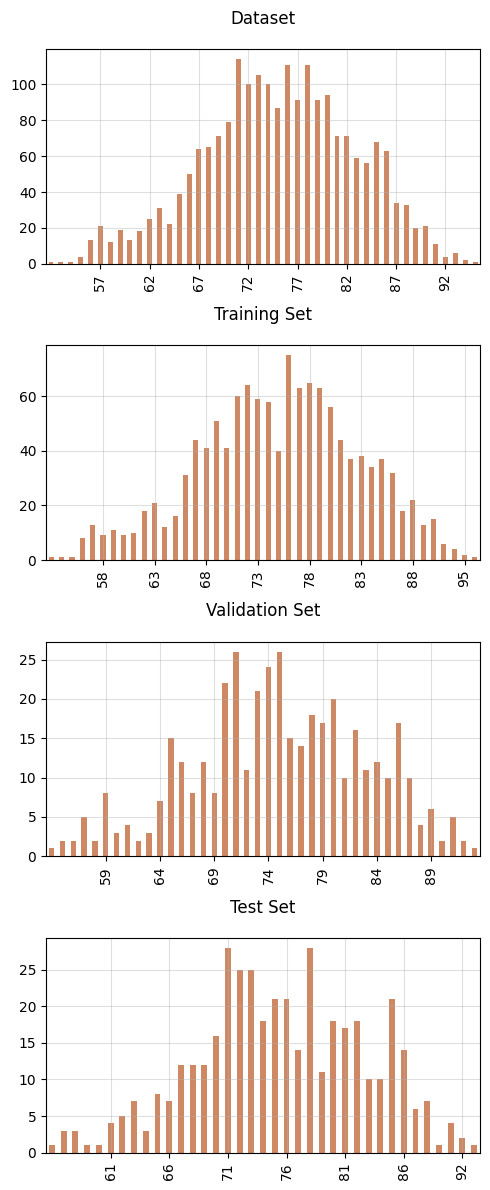

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 12))

def create_age_bar(axs: np.ndarray, idx: int, df: DataFrame, label: str) -> None:
    age_counts = df['age'].value_counts().sort_index()
    age_counts.plot(kind='bar', ax=axs[idx], color='#CE8964')
    axs[idx].grid(visible=True, alpha=0.4)
    axs[idx].set_title(label=label, pad=18)
    axs[idx].set_xticks(ticks=range(5, len(age_counts.index), 5))
    axs[idx].set_xlabel(xlabel='')

create_age_bar(axs, 0, dataset, DATASET_LABEL)
create_age_bar(axs, 1, train, TRAINING_LABEL)
create_age_bar(axs, 2, valid, VALIDATION_LABEL)
create_age_bar(axs, 3, test, TESTING_LABEL)

plt.tight_layout()
plt.show()

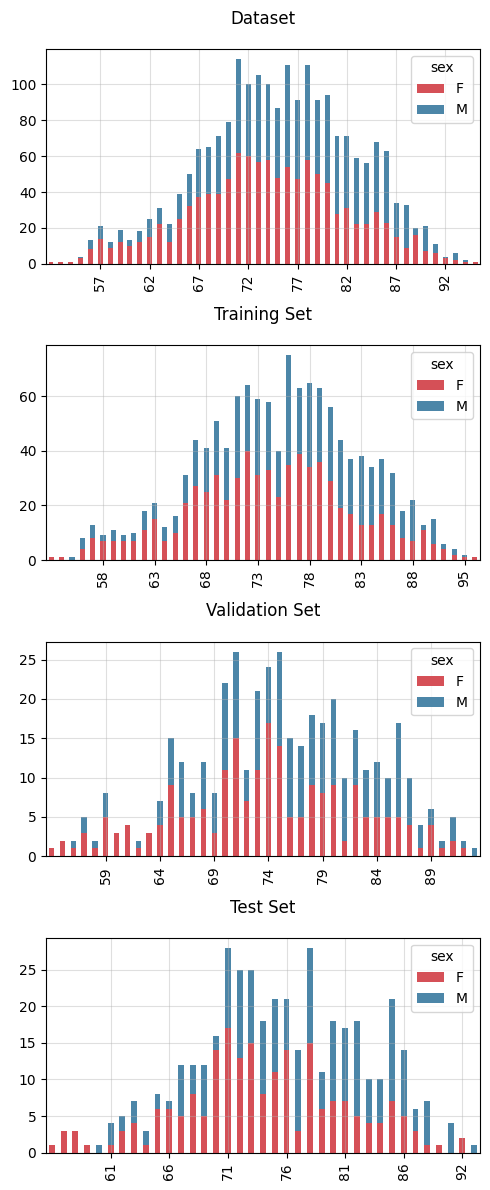

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 12))

def create_age_gender_sbar(axs: np.ndarray[Axes], idx: int, df: DataFrame, label: str) -> None: 
    age_gender_counts = df.groupby(['age', 'sex']).size().unstack(fill_value=0)
    age_gender_counts.plot(kind='bar', stacked=True, ax=axs[idx], color=['#D55057', '#4C86A8'])
    axs[idx].grid(visible=True, alpha=0.4)
    axs[idx].set_title(label=label, pad=18)
    axs[idx].set_xticks(ticks=range(5, len(age_gender_counts.index), 5))
    axs[idx].set_xlabel(xlabel='')

create_age_gender_sbar(axs, 0, dataset, DATASET_LABEL)
create_age_gender_sbar(axs, 1, train, TRAINING_LABEL)
create_age_gender_sbar(axs, 2, valid, VALIDATION_LABEL)
create_age_gender_sbar(axs, 3, test, TESTING_LABEL)

plt.tight_layout()
plt.show()

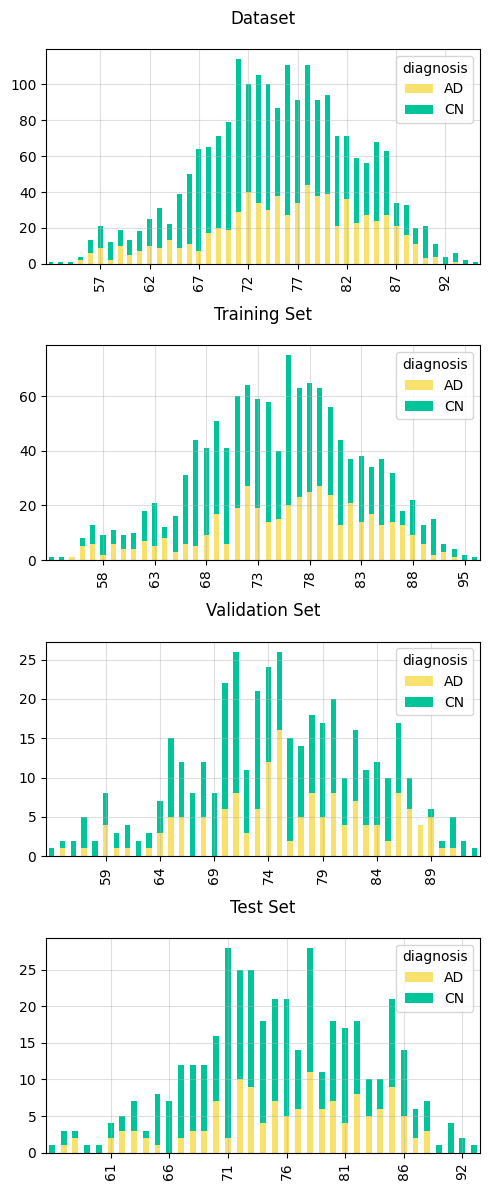

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 12))

def create_diagnosis_age_sbar(axs: np.ndarray[Axes], idx: int, df: DataFrame, label: str) -> None: 
    age_diagnosis_counts = df.groupby(['age', 'diagnosis']).size().unstack(fill_value=0)
    age_diagnosis_counts.plot(kind='bar', stacked=True, ax=axs[idx], color=['#F8E16C', '#00C49A'])
    axs[idx].grid(visible=True, alpha=0.4)
    axs[idx].set_title(label=label, pad=18)
    axs[idx].set_xticks(ticks=range(5, len(age_diagnosis_counts.index), 5))
    axs[idx].set_xlabel(xlabel='')

create_diagnosis_age_sbar(axs, 0, dataset, DATASET_LABEL)
create_diagnosis_age_sbar(axs, 1, train, TRAINING_LABEL)
create_diagnosis_age_sbar(axs, 2, valid, VALIDATION_LABEL)
create_diagnosis_age_sbar(axs, 3, test, TESTING_LABEL)

plt.tight_layout()
plt.show()

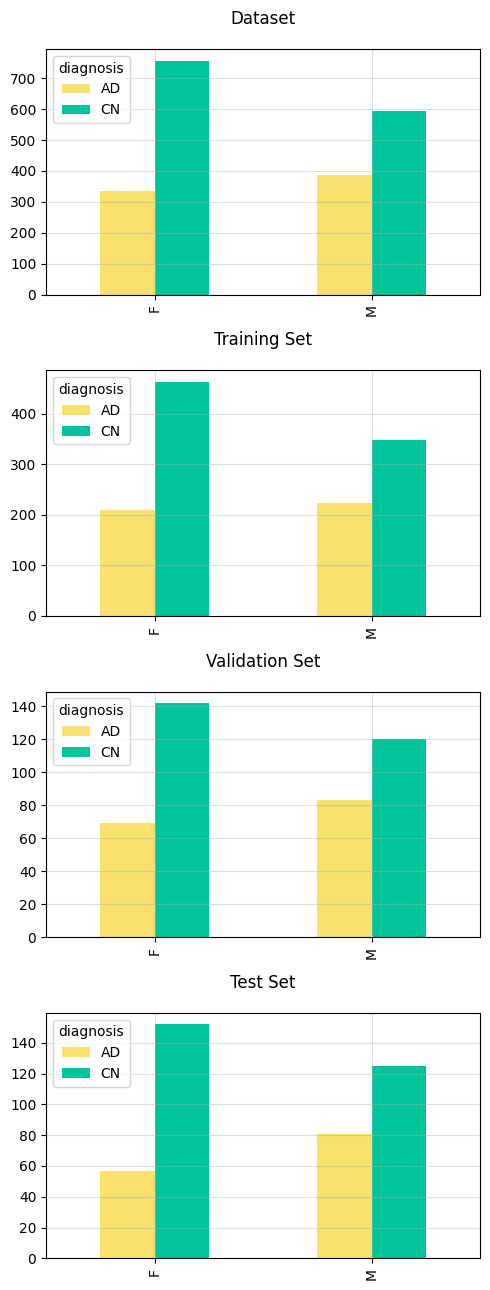

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 13))

def create_diagnosis_gender_bar(axs: np.ndarray[Axes], idx: int, df: DataFrame, label: str) -> None:
    sex_diagnosis_counts = df.pivot_table(index='sex', columns='diagnosis', aggfunc='size', fill_value=0)
    sex_diagnosis_counts.plot(kind='bar', ax=axs[idx], color=['#F8E16C', '#00C49A'])
    axs[idx].grid(visible=True, alpha=0.4)
    axs[idx].set_title(label, pad=18)
    axs[idx].set_xlabel('')

create_diagnosis_gender_bar(axs, 0, dataset, DATASET_LABEL)
create_diagnosis_gender_bar(axs, 1, train, TRAINING_LABEL)
create_diagnosis_gender_bar(axs, 2, valid, VALIDATION_LABEL)
create_diagnosis_gender_bar(axs, 3, test, TESTING_LABEL)

plt.tight_layout()
plt.show()